In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/Users/ameliabaum/Desktop/Amelia/Berkeley Fall 2019/CY PLAN 257/Final Project/data/'


In [3]:
zcode_data = pd.read_csv(data_path+"zip_code_features.csv")
zcode_data.head()


,ZIP,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,90001,8,4,1,12,2,12,12,53,30,35,28,4,79,0,0
1,90002,6,2,5,2,0,1,1,22,14,9,16,0,22,0,0
2,90003,14,0,6,8,10,8,4,35,34,37,20,0,65,0,0
3,90004,8,4,6,10,5,5,8,29,33,48,49,4,46,0,0
4,90005,11,0,2,4,2,3,5,28,25,30,41,1,30,0,0


In [39]:
# standard_data
features = zcode_data.columns[1:]
len(features)

15

In [5]:
from sklearn.preprocessing import StandardScaler
features = zcode_data.columns[1:]
# Separating out the features
x = zcode_data.loc[:, features].values
# Separating out the target
# y = zcode_data.loc[:,['ZIP']].values
# Standardizing the features
standard_data = StandardScaler().fit_transform(x)

/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
standard_data

array([[-0.45146976, -0.2282974 , -0.59349441, ..., -0.19194926,
        -0.2226495 , -0.08128355],
       [-0.51653513, -0.41394708, -0.23427196, ..., -0.59231498,
        -0.2226495 , -0.08128355],
       [-0.25627366, -0.59959675, -0.14446635, ..., -0.2902847 ,
        -0.2226495 , -0.08128355],
       ...,
       [-0.71173123, -0.59959675, -0.68330002, ..., -0.73279417,
        -0.2226495 , -0.08128355],
       [-0.61413318, -0.59959675, -0.68330002, ..., -0.69767437,
        -0.2226495 , -0.08128355],
       [ 1.46795858,  0.32865162,  0.39436732, ...,  1.26201043,
         3.79172405, -0.08128355]])

In [26]:
n_components = 10
pca_model = PCA(n_components)
principalComponents = pca_model.fit_transform(standard_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["principal component {0}".format(i+1) for i in range(n_components)])

In [40]:
PCs = pca_model.components_
pd.DataFrame(PCs, columns = zcode_data.columns[1:])

#looks like the first PC is weighting almost all of the feats equally. this might suggest that the bucketing is
#smoothing a lot of variability which ight be informative

,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,0.283738,0.265887,0.272161,0.290097,0.268897,0.270615,0.277672,0.305830,0.305823,0.300181,0.210336,0.209249,0.301222,0.098524,0.047879
1,0.059075,-0.127989,0.063379,-0.046438,-0.129129,-0.122776,0.015811,-0.018614,-0.047930,-0.025308,0.187095,-0.009982,-0.095266,0.640606,0.695785
2,0.122968,-0.129710,-0.214799,0.010702,-0.143924,-0.182866,-0.150996,0.018022,-0.016116,0.010506,0.606238,0.591882,-0.200122,0.042248,-0.290635
3,-0.006072,-0.024477,0.043676,-0.011404,-0.036033,-0.059801,0.032956,0.003667,-0.004817,0.006434,0.127582,0.205568,-0.038828,-0.740692,0.618563
4,-0.139374,0.110696,-0.062605,0.051101,0.100889,0.044659,-0.151780,-0.089982,-0.035264,-0.031262,-0.605072,0.714498,0.067727,0.155219,0.104705
5,0.046830,0.575723,-0.195779,0.053989,0.477506,-0.464236,-0.333266,0.021455,0.054201,-0.169362,0.102362,-0.139030,-0.031767,0.017946,0.085394
6,-0.335338,0.083396,-0.717385,0.033295,0.162528,0.511943,0.142704,-0.009384,0.033422,0.041745,0.159948,-0.055583,-0.054262,0.045501,0.139077
7,-0.527625,-0.230999,0.412590,-0.076248,0.373984,0.197380,-0.477883,-0.032852,0.049686,0.174389,0.223560,0.000501,-0.023735,0.022561,-0.000513
8,-0.197222,0.484575,0.103796,0.331500,-0.649372,0.187022,-0.364955,0.052579,-0.014006,0.061569,0.060282,-0.069003,-0.005349,-0.000349,0.024402
9,-0.146871,0.488974,0.237190,-0.711636,-0.058345,0.120277,0.296885,-0.068560,-0.100435,-0.033174,0.124463,0.134099,-0.130190,0.035703,-0.055236


In [28]:
principalDf.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-0.423623,-0.083533,0.397452,0.197063,-0.230190,-0.501068,0.666776,-0.257801,0.028350,0.264847
1,-1.745629,0.083720,0.201421,0.096383,-0.283668,0.092012,-0.216111,0.178703,0.127664,0.168795
2,-0.834414,-0.046175,0.043871,0.066960,-0.401268,-0.161330,0.047203,0.367820,-0.221669,-0.088339
3,-0.506615,0.124565,0.854259,0.318724,-0.579451,-0.121643,0.174170,0.282365,0.028581,0.365338
4,-1.221657,0.184625,0.725162,0.210071,-0.730450,-0.098222,0.188791,0.131596,-0.117151,0.126278


In [29]:
finalDf = pd.concat([principalDf, zcode_data[['ZIP']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,ZIP
0,-0.423623,-0.083533,0.397452,0.197063,-0.230190,-0.501068,0.666776,-0.257801,0.028350,0.264847,90001
1,-1.745629,0.083720,0.201421,0.096383,-0.283668,0.092012,-0.216111,0.178703,0.127664,0.168795,90002
2,-0.834414,-0.046175,0.043871,0.066960,-0.401268,-0.161330,0.047203,0.367820,-0.221669,-0.088339,90003
3,-0.506615,0.124565,0.854259,0.318724,-0.579451,-0.121643,0.174170,0.282365,0.028581,0.365338,90004
4,-1.221657,0.184625,0.725162,0.210071,-0.730450,-0.098222,0.188791,0.131596,-0.117151,0.126278,90005


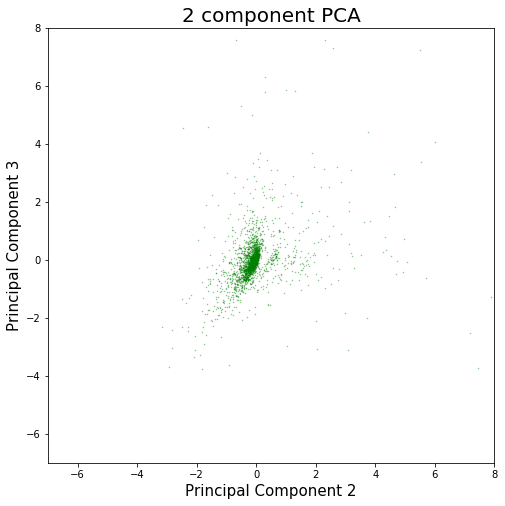

In [30]:
plt.figure(figsize = (8,8))

ax = plt.scatter(finalDf.iloc[:,1], finalDf.iloc[:,2], color='g', alpha=.5, edgecolor='g', s=0.2)
plt.xlabel('Principal Component 2', fontsize = 15)
plt.ylabel('Principal Component 3', fontsize = 15)
plt.xlim(-7,8)
plt.ylim(-7,8)
plt.title('2 component PCA', fontsize = 20)
plt.show()

In [31]:
explained = pca_model.explained_variance_ratio_
explained_sum = np.cumsum(explained)
# eigenvector = np.array(range(1,24))

print(explained_sum)
# print(len(eigenvector))

[0.69247122 0.7860315  0.83902699 0.87668953 0.90675411 0.93347087
 0.94879576 0.96317433 0.97485753 0.98480122]


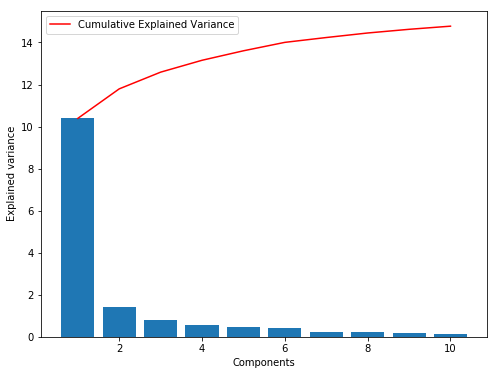

In [32]:
plt.figure(figsize=(8,6))
plt.bar(range(1,len(pca_model.explained_variance_ )+1),pca_model.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_model.explained_variance_ )+1),
         np.cumsum(pca_model.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

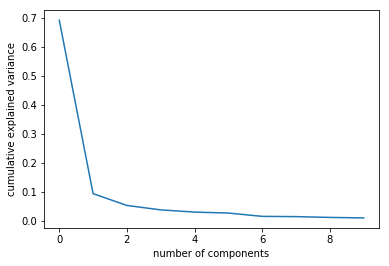

In [33]:
plt.plot(pca_model.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-0.423623,-0.083533,0.397452,0.197063,-0.230190,-0.501068,0.666776,-0.257801,0.028350,0.264847
1,-1.745629,0.083720,0.201421,0.096383,-0.283668,0.092012,-0.216111,0.178703,0.127664,0.168795
2,-0.834414,-0.046175,0.043871,0.066960,-0.401268,-0.161330,0.047203,0.367820,-0.221669,-0.088339
3,-0.506615,0.124565,0.854259,0.318724,-0.579451,-0.121643,0.174170,0.282365,0.028581,0.365338
4,-1.221657,0.184625,0.725162,0.210071,-0.730450,-0.098222,0.188791,0.131596,-0.117151,0.126278


In [35]:
import plotly.express as px
#projection of the data onto the first 3 PCs, most of the variation is in PC1
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
                   opacity=0.7)
fig.show()

In [17]:
pca_model.components_

array([[ 0.28373778,  0.26588663,  0.27216057,  0.29009721,  0.26889711,
         0.27061518,  0.27767242,  0.30583002,  0.30582345,  0.30018113,
         0.210336  ,  0.20924901,  0.30122216,  0.09852404,  0.04787862],
       [ 0.05907502, -0.12798884,  0.06337881, -0.04643762, -0.12912901,
        -0.12277595,  0.01581066, -0.01861402, -0.04793027, -0.02530791,
         0.18709465, -0.00998238, -0.09526601,  0.64060638,  0.69578515],
       [ 0.12296841, -0.12971033, -0.21479936,  0.01070215, -0.14392379,
        -0.18286579, -0.15099631,  0.01802214, -0.01611636,  0.01050636,
         0.60623841,  0.59188199, -0.20012228,  0.04224767, -0.29063524],
       [-0.0060724 , -0.02447723,  0.04367647, -0.01140412, -0.03603331,
        -0.05980149,  0.03295597,  0.00366747, -0.00481749,  0.00643401,
         0.12758187,  0.20556819, -0.03882785, -0.74069158,  0.61856326]])

In [18]:
standard_data
std_data = pd.DataFrame(standard_data, columns=zcode_data.columns[1:])
std_data.head()

,num_sw,num_ndnw,num_pickdrop,num_discret,num_shop,num_home,num_em,num_m,num_aft,num_evn,num_walk,num_bike,num_auto,num_transit,num_other
0,-0.451470,-0.228297,-0.593494,-0.217862,-0.469301,0.195842,0.474106,0.105528,-0.274079,-0.103312,0.350719,0.114176,-0.191949,-0.22265,-0.081284
1,-0.516535,-0.413947,-0.234272,-0.647192,-0.571818,-0.613262,-0.624174,-0.393461,-0.525925,-0.569825,-0.008155,-0.412324,-0.592315,-0.22265,-0.081284
2,-0.256274,-0.599597,-0.144466,-0.389594,-0.059233,-0.098377,-0.324643,-0.184208,-0.211118,-0.067427,0.111470,-0.412324,-0.290285,-0.22265,-0.081284
3,-0.451470,-0.228297,-0.144466,-0.303728,-0.315525,-0.319042,0.074732,-0.280786,-0.226858,0.129944,0.978750,0.114176,-0.423740,-0.22265,-0.081284
4,-0.353872,-0.599597,-0.503689,-0.561326,-0.469301,-0.466152,-0.224799,-0.296883,-0.352781,-0.193026,0.739500,-0.280699,-0.536123,-0.22265,-0.081284


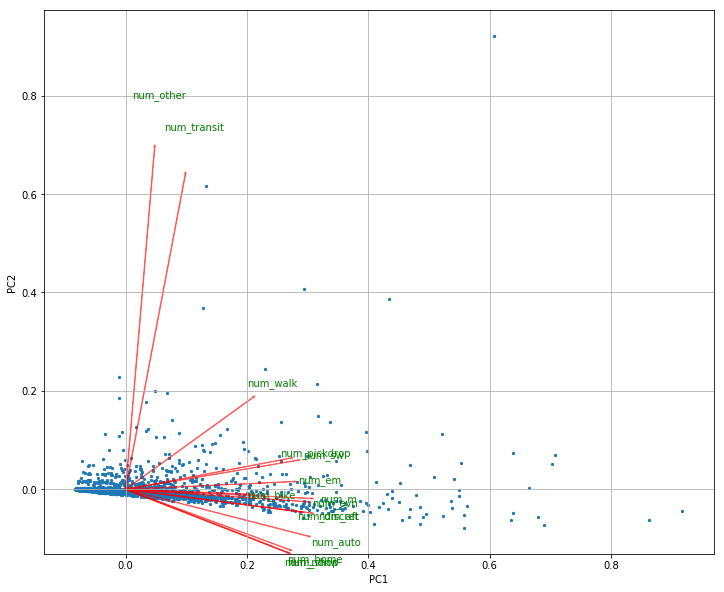

In [19]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(12,10))
myplot(principalComponents[:,0:2],np.transpose(pca_model.components_[0:2, :]),list(std_data.columns))
plt.show()

In [20]:
# zcode_data

4

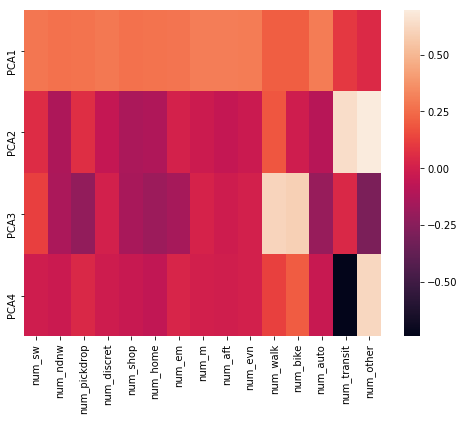

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(pca_model.components_,
      yticklabels=[ "PCA"+str(x) for x in range(1,pca_model.n_components_+1)],
        xticklabels=list(features) )
pca_model.n_components